# Ship Performance Clustering 🛳️

## About Dataset

The Ship Performance Dataset is a synthetic yet realistic collection of data designed to represent key operational metrics and attributes of various ship types in the Gulf of Guinea. This dataset will be used for exploring clustering, prediction,  problems in the maritime industry.

### Motivation


The maritime sector is one of the most critical components of global trade, contributing significantly to economic growth and sustainability. Understanding ship performance, fuel efficiency, and operational cost factors are essential for improving decision-making and minimizing environmental impact.

This dataset aims to provide a platform for exploring ship performance trends, identifying patterns, and solving real-world maritime challenges through data-driven approaches.

## Use Case

1. Exploratory Data Analysis (EDA): Identify trends and patterns in ship performance and operational efficiency.
2. Clustering Analysis: Segment ships based on performance metrics and categorical attributes.
3. Optimization: Analyze trade-offs between operational costs and revenue to improve profitability.

## Step 1: Loading the Dependencies

In [1]:
import pandas as pd # for manipulation
import numpy as np # for statistical calculation
import matplotlib.pyplot as plt # for visualization
%matplotlib inline
import seaborn as sns # for visualization
import warnings
from warnings import filterwarnings

## Step 2: Importing the data

In [2]:
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Display the first five rows
df.head(5)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [3]:
# Shape of the data
print('Number of Rows: ', df.shape[0])
print('Number of Columns: ', df.shape[1])

Number of Rows:  2736
Number of Columns:  18


In [4]:
# Display all columns
print(df.columns)
print('Total number of columns:',len(df.columns))

Index(['Date', 'Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Weather_Condition', 'Cargo_Weight_tons',
       'Operational_Cost_USD', 'Revenue_per_Voyage_USD',
       'Turnaround_Time_hours', 'Efficiency_nm_per_kWh',
       'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')
Total number of columns: 18


In [5]:
df.dtypes

Date                        object
Ship_Type                   object
Route_Type                  object
Engine_Type                 object
Maintenance_Status          object
Speed_Over_Ground_knots    float64
Engine_Power_kW            float64
Distance_Traveled_nm       float64
Draft_meters               float64
Weather_Condition           object
Cargo_Weight_tons          float64
Operational_Cost_USD       float64
Revenue_per_Voyage_USD     float64
Turnaround_Time_hours      float64
Efficiency_nm_per_kWh      float64
Seasonal_Impact_Score      float64
Weekly_Voyage_Count          int64
Average_Load_Percentage    float64
dtype: object

### Observation

1. File Format: CSV (Comma Separated Values)
2. Number of Rows: 2736
3. Number of Columns: 18

#### Datatypes
1. Numerical: 13 features (e.g., speed, engine power, cost).
2. Categorical: 5 features (e.g., ship type, route type, maintenance status).

## Step 3: Data Wrangling

In [6]:
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [7]:
# Converting the columns to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'ship_type', 'route_type', 'engine_type', 'maintenance_status',
       'speed_over_ground_knots', 'engine_power_kw', 'distance_traveled_nm',
       'draft_meters', 'weather_condition', 'cargo_weight_tons',
       'operational_cost_usd', 'revenue_per_voyage_usd',
       'turnaround_time_hours', 'efficiency_nm_per_kwh',
       'seasonal_impact_score', 'weekly_voyage_count',
       'average_load_percentage'],
      dtype='object')

In [8]:
df['date'].dtype

dtype('O')

In [9]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.head()

,date,ship_type,route_type,engine_type,maintenance_status,speed_over_ground_knots,engine_power_kw,distance_traveled_nm,draft_meters,weather_condition,cargo_weight_tons,operational_cost_usd,revenue_per_voyage_usd,turnaround_time_hours,efficiency_nm_per_kwh,seasonal_impact_score,weekly_voyage_count,average_load_percentage
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [10]:
df.dtypes

date                       datetime64[ns]
ship_type                          object
route_type                         object
engine_type                        object
maintenance_status                 object
speed_over_ground_knots           float64
engine_power_kw                   float64
distance_traveled_nm              float64
draft_meters                      float64
weather_condition                  object
cargo_weight_tons                 float64
operational_cost_usd              float64
revenue_per_voyage_usd            float64
turnaround_time_hours             float64
efficiency_nm_per_kwh             float64
seasonal_impact_score             float64
weekly_voyage_count                 int64
average_load_percentage           float64
dtype: object

In [11]:
# Check for missing values
df.isnull().sum()

date                       0
ship_type                  0
route_type                 0
engine_type                0
maintenance_status         0
speed_over_ground_knots    0
engine_power_kw            0
distance_traveled_nm       0
draft_meters               0
weather_condition          0
cargo_weight_tons          0
operational_cost_usd       0
revenue_per_voyage_usd     0
turnaround_time_hours      0
efficiency_nm_per_kwh      0
seasonal_impact_score      0
weekly_voyage_count        0
average_load_percentage    0
dtype: int64

# Step 4: Data Exploration

In [12]:
df.columns

Index(['date', 'ship_type', 'route_type', 'engine_type', 'maintenance_status',
       'speed_over_ground_knots', 'engine_power_kw', 'distance_traveled_nm',
       'draft_meters', 'weather_condition', 'cargo_weight_tons',
       'operational_cost_usd', 'revenue_per_voyage_usd',
       'turnaround_time_hours', 'efficiency_nm_per_kwh',
       'seasonal_impact_score', 'weekly_voyage_count',
       'average_load_percentage'],
      dtype='object')

In [13]:
numerical_columns = df.select_dtypes(exclude = ['object', 'datetime'])
numerical_columns.dtypes

speed_over_ground_knots    float64
engine_power_kw            float64
distance_traveled_nm       float64
draft_meters               float64
cargo_weight_tons          float64
operational_cost_usd       float64
revenue_per_voyage_usd     float64
turnaround_time_hours      float64
efficiency_nm_per_kwh      float64
seasonal_impact_score      float64
weekly_voyage_count          int64
average_load_percentage    float64
dtype: object

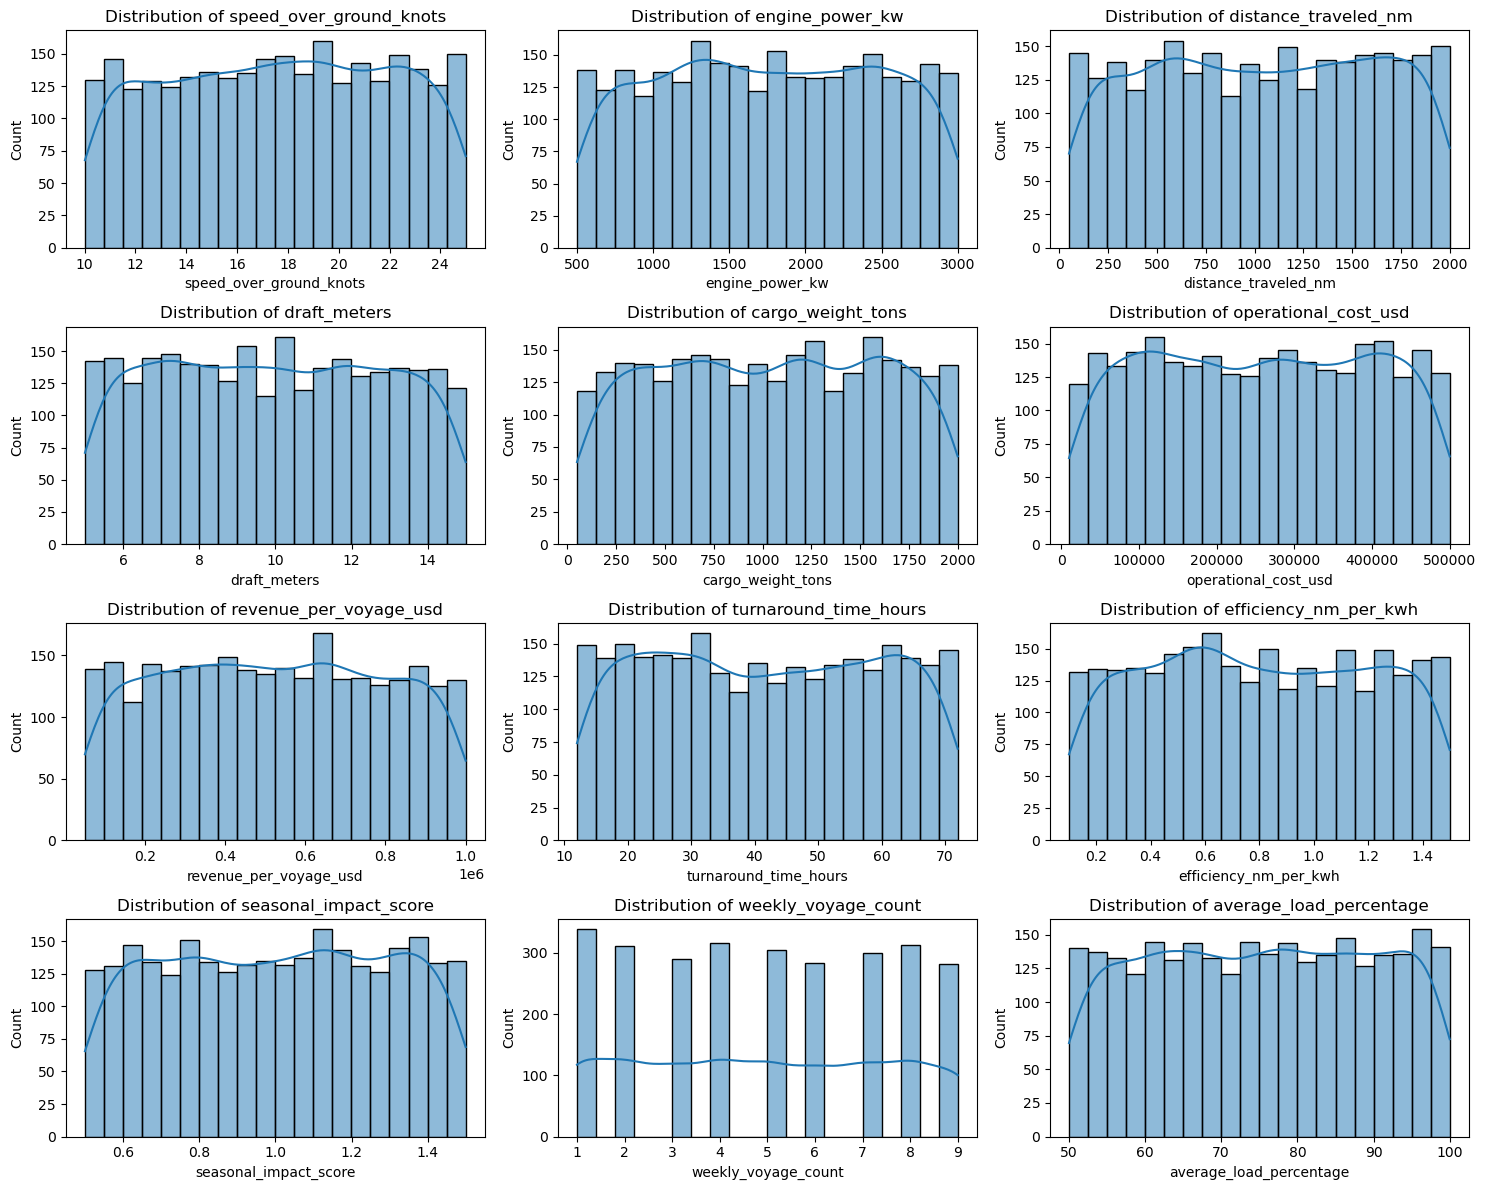

In [31]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

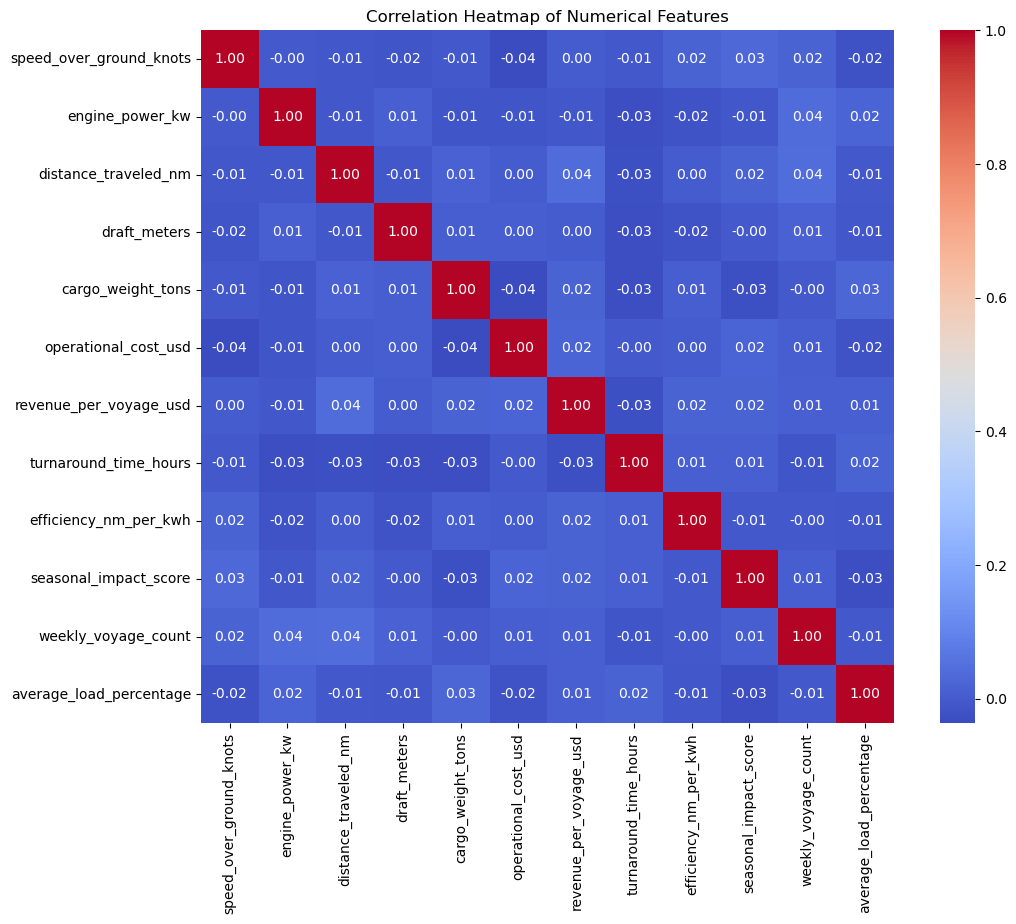

In [23]:
# Plot a correlation heatmap
plt.figure(figsize=(12, 9))
corr = numerical_columns.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [48]:
categorical_columns = df.select_dtypes(exclude=['int', 'float', 'datetime'])
categorical_columns

,ship_type,route_type,engine_type,maintenance_status,weather_condition
0,Container Ship,None,Heavy Fuel Oil (HFO),Critical,Moderate
1,Fish Carrier,Short-haul,Steam Turbine,Good,Rough
2,Container Ship,Long-haul,Diesel,Fair,Moderate
3,Bulk Carrier,Transoceanic,Steam Turbine,Fair,Moderate
4,Fish Carrier,Transoceanic,Diesel,Fair,Moderate
...,...,...,...,...,...
2731,Tanker,Short-haul,Heavy Fuel Oil (HFO),Good,Moderate
2732,Bulk Carrier,Short-haul,Heavy Fuel Oil (HFO),Good,None
2733,Container Ship,Short-haul,Steam Turbine,Critical,None
2734,Tanker,Transoceanic,Heavy Fuel Oil (HFO),Good,Moderate


In [51]:
df.columns

Index(['date', 'ship_type', 'route_type', 'engine_type', 'maintenance_status',
       'speed_over_ground_knots', 'engine_power_kw', 'distance_traveled_nm',
       'draft_meters', 'weather_condition', 'cargo_weight_tons',
       'operational_cost_usd', 'revenue_per_voyage_usd',
       'turnaround_time_hours', 'efficiency_nm_per_kwh',
       'seasonal_impact_score', 'weekly_voyage_count',
       'average_load_percentage'],
      dtype='object')

<AxesSubplot:xlabel='ship_type', ylabel='count'>

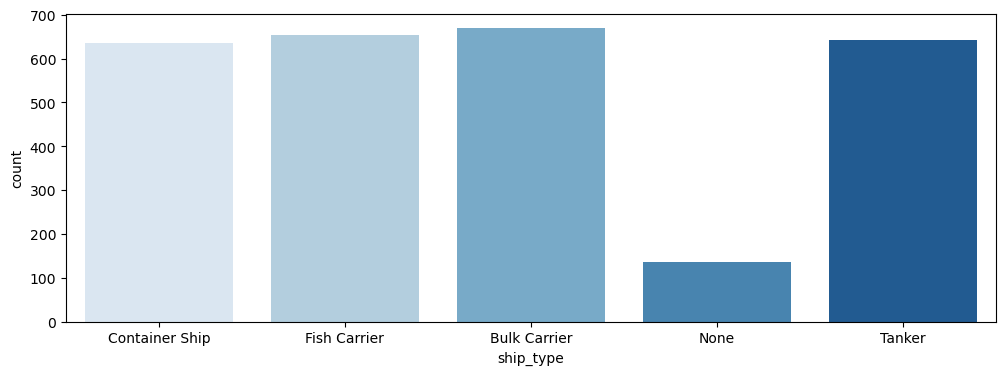

In [94]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'ship_type', data = df, palette = 'Blues')

<AxesSubplot:xlabel='route_type', ylabel='count'>

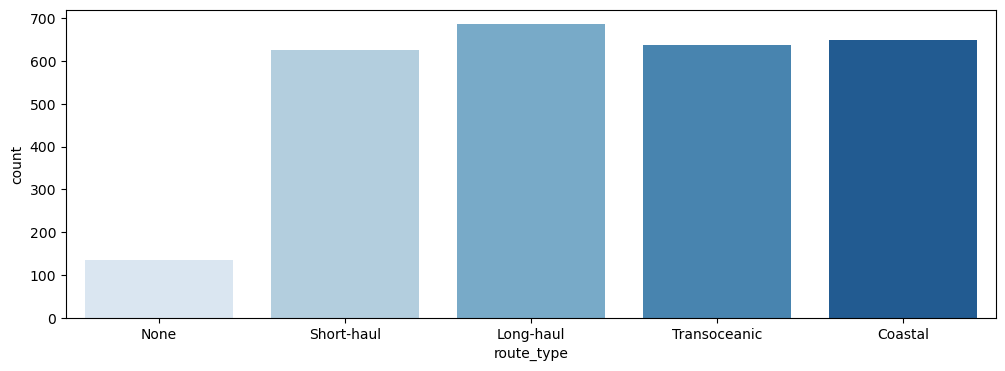

In [93]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'route_type', data = df, palette = 'Blues')

<AxesSubplot:xlabel='engine_type', ylabel='count'>

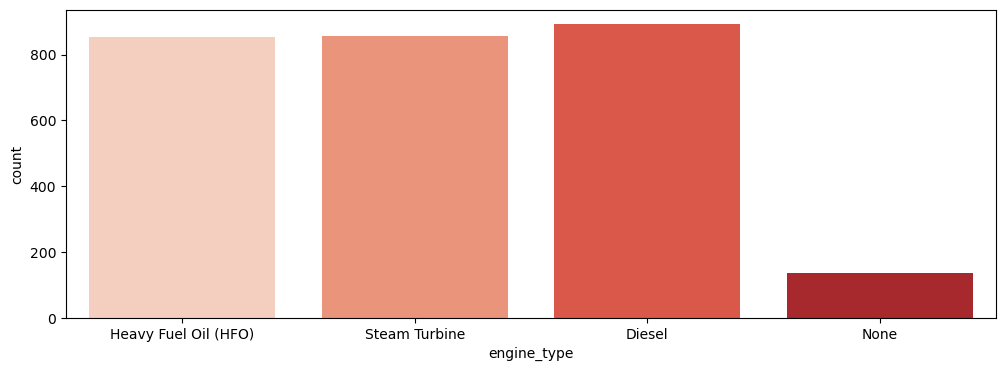

In [95]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'engine_type', data = df, palette = 'Reds')

<AxesSubplot:xlabel='maintenance_status', ylabel='count'>

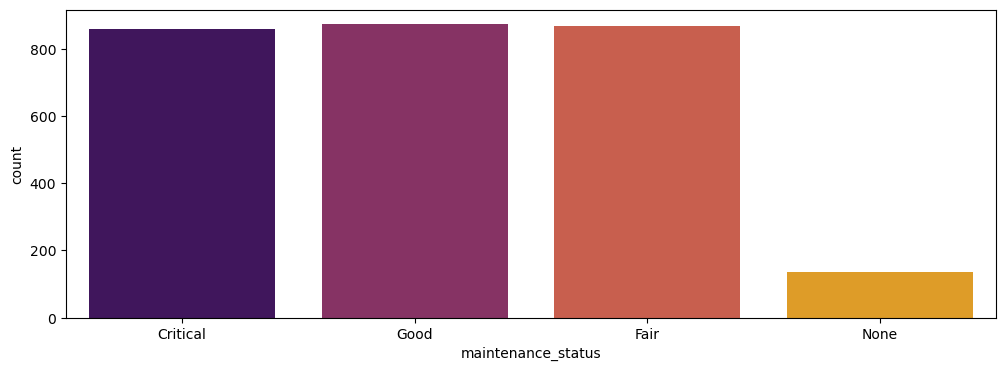

In [96]:
plt.figure(figsize=(12, 4))
sns.countplot(x = 'maintenance_status', data = df, palette = 'inferno')

In [97]:
df.head()

,date,ship_type,route_type,engine_type,maintenance_status,speed_over_ground_knots,engine_power_kw,distance_traveled_nm,draft_meters,weather_condition,cargo_weight_tons,operational_cost_usd,revenue_per_voyage_usd,turnaround_time_hours,efficiency_nm_per_kwh,seasonal_impact_score,weekly_voyage_count,average_load_percentage
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [98]:
df.columns

Index(['date', 'ship_type', 'route_type', 'engine_type', 'maintenance_status',
       'speed_over_ground_knots', 'engine_power_kw', 'distance_traveled_nm',
       'draft_meters', 'weather_condition', 'cargo_weight_tons',
       'operational_cost_usd', 'revenue_per_voyage_usd',
       'turnaround_time_hours', 'efficiency_nm_per_kwh',
       'seasonal_impact_score', 'weekly_voyage_count',
       'average_load_percentage'],
      dtype='object')

### 4.1. Average Operational Cost of each Engine type

In [126]:
# engine_type average operational_cost
engine_cost = df.groupby('engine_type')[['operational_cost_usd']].mean().round(2)
engine_cost = engine_cost.sort_values(by = 'operational_cost_usd', ascending = False)
engine_cost

,operational_cost_usd
engine_type,
Heavy Fuel Oil (HFO),258134.50
None,255490.20
Steam Turbine,254429.82
Diesel,252914.01


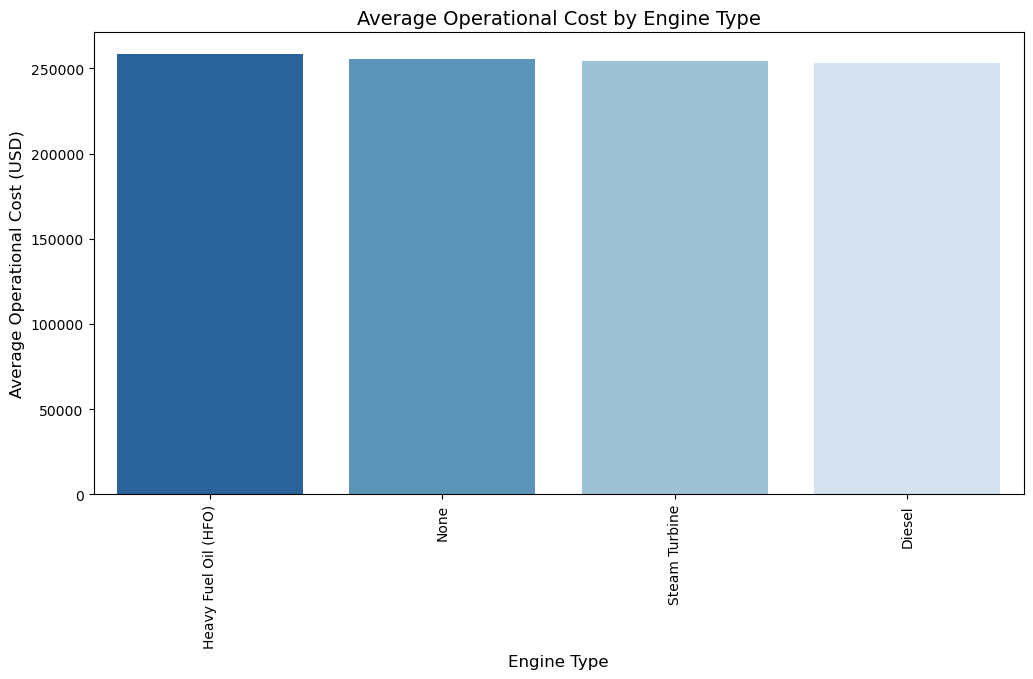

In [135]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x = engine_cost.index, y = engine_cost['operational_cost_usd'], palette = 'Blues_r')

# Customize the plot
plt.xlabel("Engine Type", fontsize=12)
plt.ylabel("Average Operational Cost (USD)", fontsize=12)
plt.title("Average Operational Cost by Engine Type", fontsize=14)
plt.xticks(rotation = 90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

### 4.2. Average Operational Cost of each Ship type

In [130]:
df['ship_type'].unique()

array(['Container Ship', 'Fish Carrier', 'Bulk Carrier', 'None', 'Tanker'],
      dtype=object)

In [132]:
# engine_type average operational_cost
ship_cost = df.groupby('ship_type')[['operational_cost_usd']].mean().round(2)
ship_cost = ship_cost.sort_values(by = 'operational_cost_usd', ascending = False)
ship_cost

,operational_cost_usd
ship_type,
Container Ship,258542.53
Bulk Carrier,255850.19
Fish Carrier,255015.35
Tanker,253428.98
None,244515.08


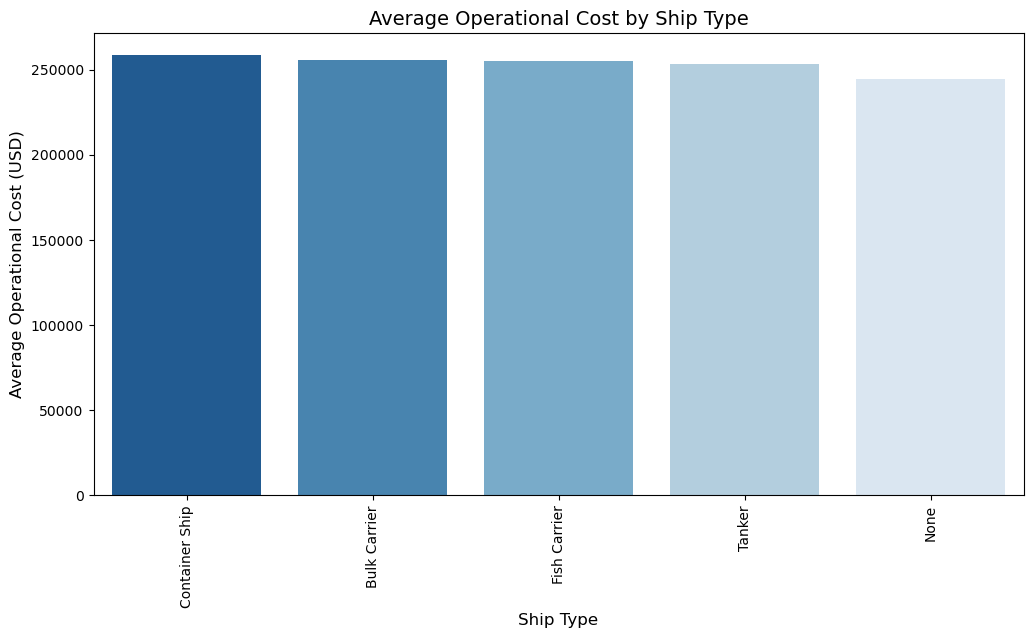

In [133]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x = ship_cost.index, y = ship_cost['operational_cost_usd'], palette = 'Blues_r')

# Customize the plot
plt.xlabel("Ship Type", fontsize=12)
plt.ylabel("Average Operational Cost (USD)", fontsize=12)
plt.title("Average Operational Cost by Ship Type", fontsize=14)
plt.xticks(rotation = 90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

### 4.3 Yearly Average Operational Cost

In [136]:
# average operational_cost based on year
df['year'] = df['date'].dt.year
yearly_cost = df.groupby('year')[['operational_cost_usd']].mean().round(2)
yearly_cost = yearly_cost.sort_values(by = 'operational_cost_usd', ascending = False)
yearly_cost

,operational_cost_usd
year,
2023,258287.74
2024,251394.26


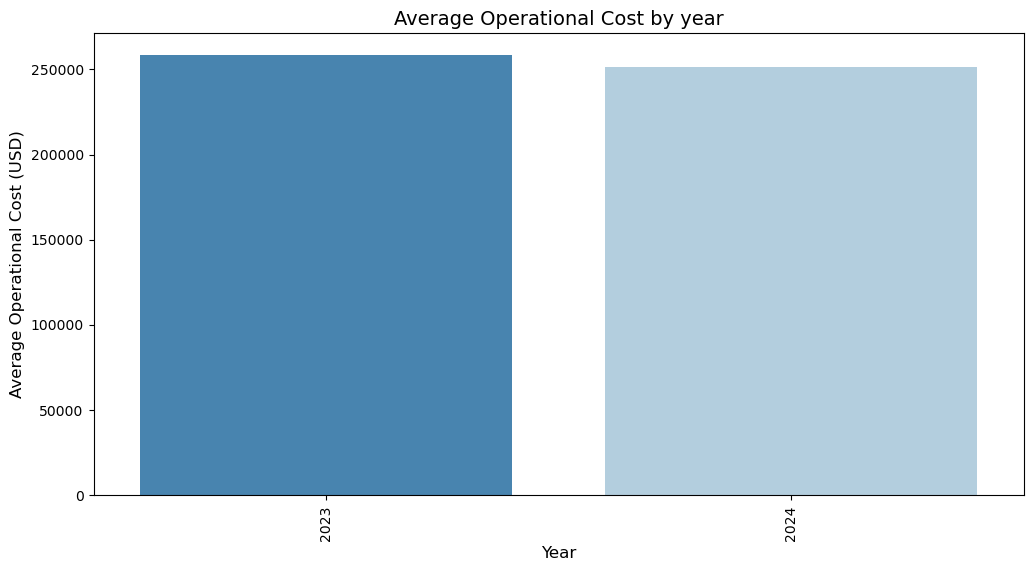

In [139]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x = yearly_cost.index, y = yearly_cost['operational_cost_usd'], palette = 'Blues_r')

# Customize the plot
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Operational Cost (USD)", fontsize=12)
plt.title("Average Operational Cost by year", fontsize=14)
plt.xticks(rotation = 90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

### 4.4 Monthly Average Operational Cost

In [146]:
# average operational_cost based on month
df['month'] = df['date'].dt.month_name()
monthly_cost = df.groupby('month')[['operational_cost_usd']].mean().round(2)
monthly_cost = monthly_cost.sort_values(by = 'month', ascending = True)
monthly_cost

,operational_cost_usd
month,
April,253709.79
August,266494.45
December,256287.79
February,266629.59
January,260062.43
July,251042.34
June,243104.65
March,249136.15
May,240975.91


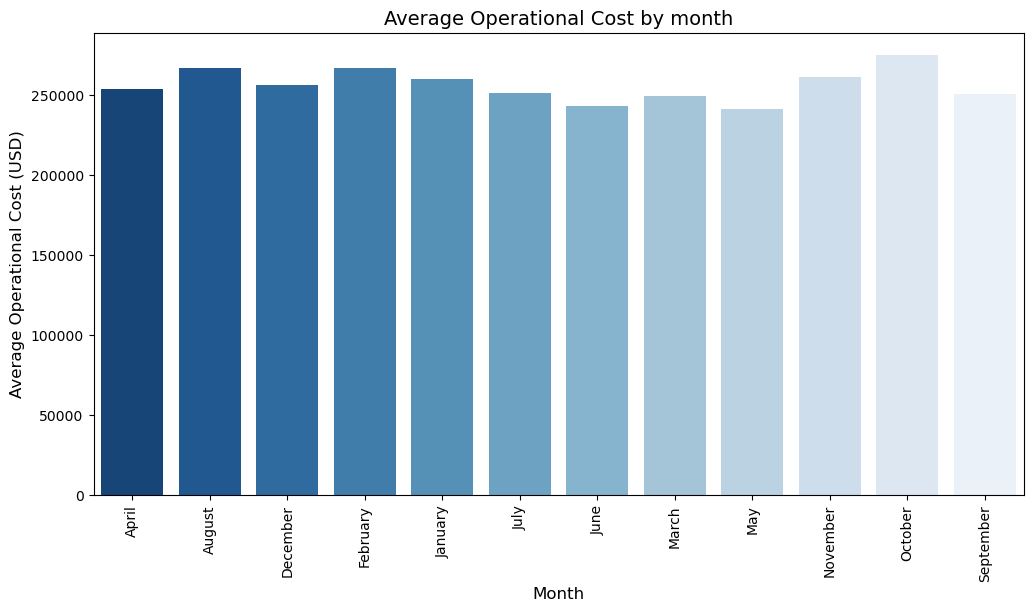

In [152]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x = monthly_cost.index, y = monthly_cost['operational_cost_usd'], palette = 'Blues_r')

# Customize the plot
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Operational Cost (USD)", fontsize=12)
plt.title("Average Operational Cost by month", fontsize=14)
plt.xticks(rotation = 90)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

### 4.5 Daily average Operational Cost

In [158]:
df.head()

,date,ship_type,route_type,engine_type,maintenance_status,speed_over_ground_knots,engine_power_kw,distance_traveled_nm,draft_meters,weather_condition,...,operational_cost_usd,revenue_per_voyage_usd,turnaround_time_hours,efficiency_nm_per_kwh,seasonal_impact_score,weekly_voyage_count,average_load_percentage,year,month,day
0,2023-06-04,Container Ship,None,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,...,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249,2023,June,4
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,...,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,2023,June,11
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,...,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,2023,June,18
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,...,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,2023,June,25
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,...,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,2023,July,2


In [161]:
# average operational_cost daily
df['day'] = df['date'].dt.day
daily_cost = df.groupby('day')[['operational_cost_usd']].mean().round(2)
daily_cost = daily_cost.sort_values(by = 'day', ascending = True)
daily_cost

,operational_cost_usd
day,
1,253823.49
2,253924.40
3,230744.26
4,265180.14
5,237201.62
6,259709.27
7,247933.41
8,258445.96
9,258727.45


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


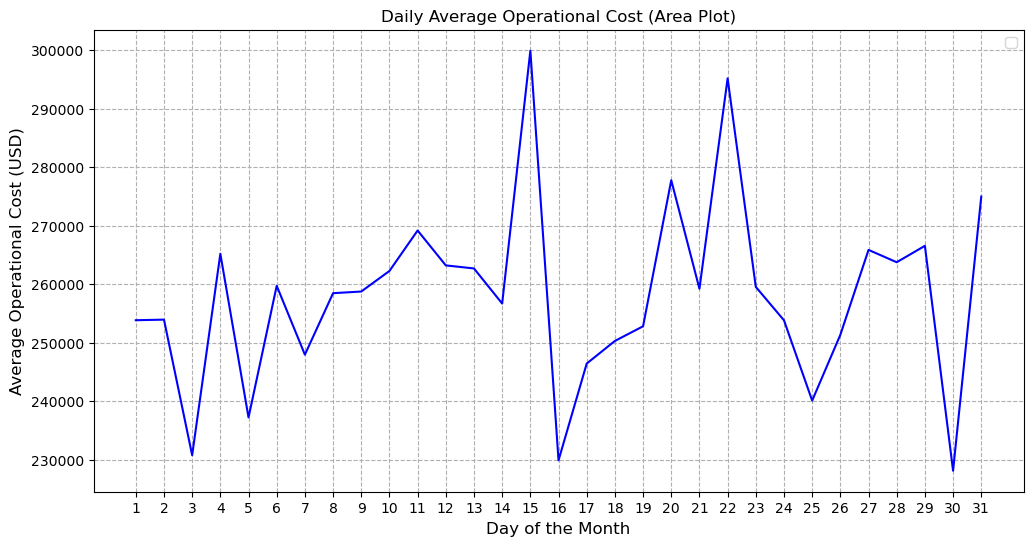

In [174]:
plt.figure(figsize=(12,6))
# Create an area plot
plt.plot(daily_cost.index, daily_cost['operational_cost_usd'], color = 'Blue')

# Labels and title
plt.xlabel("Day of the Month", fontsize = 12)
plt.ylabel("Average Operational Cost (USD)", fontsize=12)
plt.title("Daily Average Operational Cost (Area Plot)", fontsize=12)
plt.xticks(daily_cost.index)  # Show all days on x-axis

# Grid and legend
plt.grid(True, linestyle='--')
plt.legend()

## Step 5: Data Preprocessing

### 5.1 Standard Scaler

In [176]:
from sklearn.preprocessing import StandardScaler

In [177]:
# standardizing numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_scaled

array([[-1.16100314,  0.42598003, -0.0096083 , ...,  1.2786495 ,
        -0.91581094, -1.33849892],
       [-1.67361736,  0.0536309 ,  0.0423553 , ...,  1.28734312,
        -0.91581094, -0.54963471],
       [ 0.72993369, -0.1521252 , -0.66405165, ...,  1.44745821,
        -0.91581094,  0.2392295 ],
       ...,
       [-0.18304695, -0.57751326,  0.59813119, ...,  0.39676311,
         1.09192843,  0.01383972],
       [ 1.28265711,  0.37737941, -0.73377169, ...,  1.21553546,
         1.09192843,  0.80270393],
       [-1.40909487,  1.63345423,  1.57218173, ..., -0.62234008,
         1.09192843,  1.59156814]])

### 5.2 PCA (Principal Component Analysis)

Principal Component Analysis (PCA) is a dimensionality reduction technique. It helps to simplify datasets by transforming correlated variables into uncorrelated principal components, while retaining as much variance (information) as possible.

Why Use PCA?
1. Reduces the number of features (dimensions) in large datasets
2. Helps visualize high-dimensional data in 2D or 3D
3. Removes noise and redundant information
4. Improves efficiency in machine learning models

When to Use PCA?
1. When dealing with high-dimensional data (too many features)
2. When features are highly correlated
3. When you need to visualize data in 2D/3D
4. To improve machine learning performance by reducing overfitting

In [179]:
from sklearn.decomposition import PCA

In [180]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[-0.60720062, -1.91781218],
       [-0.13987749, -0.52964328],
       [ 0.75994333,  0.41643207],
       ...,
       [-1.19719387,  0.4970062 ],
       [-0.50633397,  0.64330977],
       [ 0.23601091,  1.83347637]])

## 6. Clustering Analysis

Clustering is an unsupervised machine learning technique used to group similar data points together based on patterns in the data. It helps identify hidden structures without labeled data.

In [183]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

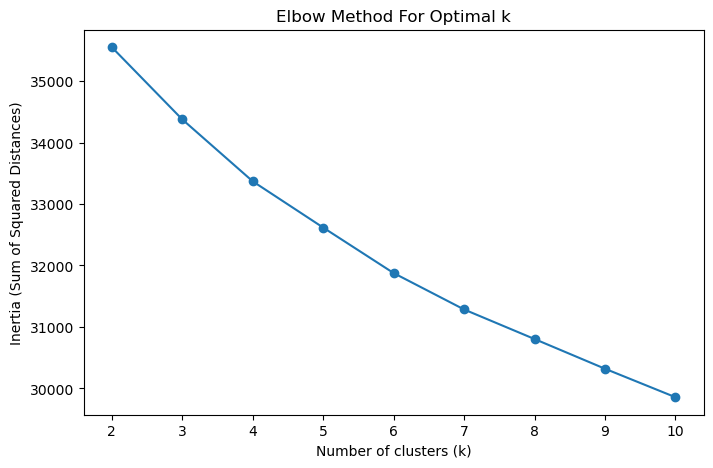

In [185]:
inertia = []
cluster_range = range(2, 11)  # Testing cluster counts from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve.
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.show()

In [194]:
# k-means clustering
kmeans = KMeans(n_clusters = 5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_pca)
kmeans_score = silhouette_score(df_pca, kmeans_labels)
print(f"K-Means Score: {kmeans_score:.2f}")

K-Means Score: 0.31


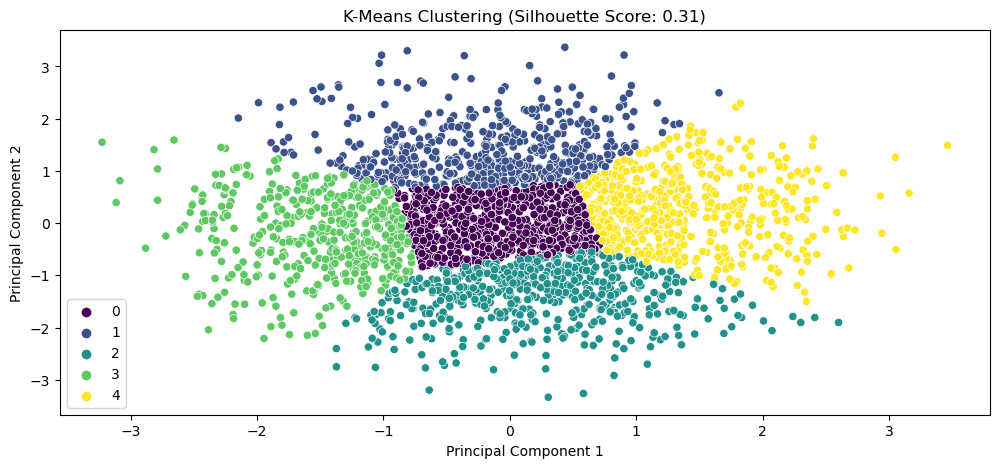

In [195]:
# K-Means Clustering
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title(f'K-Means Clustering (Silhouette Score: {kmeans_score:.2f})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Explanation of the K-Means Clustering Result

This visualization shows how K-Means clustering groups your data after applying PCA.

What the Plot Represents
1. Each point represents a data sample projected onto two principal components (PC1 & PC2).
2. Different colors represent different clusters found by K-Means.
3. Silhouette Score is included in the title, which measures how well each point fits into its assigned cluster (higher is better).

Key Observations
1. The clusters overlaps a little, so the model did not do good job.
2. A higher Silhouette Score (closer to 1) means better-defined clusters; near 0 suggests overlap; negative values indicate misclassified points.

The score shows 0.31 which means the cluster overlaps which is not good enough